<a href="https://colab.research.google.com/github/Camilanv95/Entrega-Proyecto-Final-Coder/blob/main/ENTREGA_FINAL_CAMILA_VARELA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Modelo de predicción de incumplimento de préstamos***

# **Contexto**

En el campo de la gestión del riesgo crediticio, los bancos utilizan técnicas de aprendizaje automático (ML) para crear varios modelos para predecir los incumplimientos de los préstamos. Los modelos de aprendizaje automático ayudan a detectar patrones en los datos, que luego se utilizan para categorizar nuevos registros.
Si los préstamos no se reembolsan, los bancos sufren pérdidas financieras. Para minimizar este problema, el objetivo es mantener las tasas de impago lo más bajas posible

# **Objetivos generales**

En la industria financiera, el problema de impago de préstamos por parte de los clientes representa una preocupación significativa para las entidades bancarias. Las pérdidas económicas asociadas a clientes con deudas incobrables pueden afectar la rentabilidad y estabilidad financiera de los bancos. En este proyecto, se aborda esta problemática con el objetivo de mejorar la precisión en la identificación de clientes con mayor riesgo de impago y, así, permitir que el banco tome medidas preventivas para minimizar sus pérdidas.

El fin de este caso práctico es desarrollar una comprensión del análisis de riesgos en los servicios bancarios y financieros y entender cómo se utilizan los datos para mitigar o minimizar el riesgo de perder dinero al conceder préstamos a los clientes.

Este análisis pretende identificar patrones que indiquen si un cliente tiene dificultades para saldar su deuda, lo que es útil para tomar medidas cómo denegar el préstamo, reducir el importe del mismo, establecer un tipo de interés más alto a solicitantes de riesgo, ente otras medidas.
Esto garantizará que no se rechace a los consumidores con alta probabilidad de pago.

En otras palabras, este caso tiene como finalidad comprender los factores determinantes (o variables determinantes) del impago de los préstamos, es decir, las variables que son fuertes indicadores del impago.

Los datos se exploran y analizan inicialmente, seguido de un preprocesamiento para prepararlos para el modelado. Como ultima instancia, el objetivo de este caso práctico, es abordar finalmente su rendimento.


# **Audiencia**


Este proyecto está dirigido a profesionales del sector financiero, analistas de datos, científicos de datos y cualquier persona interesada en la aplicación de técnicas de análisis de datos y aprendizaje automático en el ámbito bancario. También puede ser relevante para gerentes y tomadores de decisiones en instituciones financieras que busquen optimizar sus procesos de evaluación de riesgo y mejorar su rentabilidad. Al proporcionar recomendaciones basadas en insights observados a partir del análisis de datos, este proyecto puede ayudar a los profesionales a tomar decisiones más informadas y mitigar el riesgo asociado al impago de tarjetas de crédito.

# **Lineas futuras**

Se sugiere explorar la incorporación de nuevas características y fuentes de datos, probar diferentes algoritmos de aprendizaje automático, utilizar técnicas de ensamblado de modelos, implementar técnicas de interpretación para comprender las decisiones del modelo, segmentar a los clientes y evaluar el impacto financiero de la aplicación del modelo en la toma de decisiones del banco. Estas acciones permitirán mejorar la precisión y efectividad en la identificación de clientes elegibles para tarjetas de crédito y en la predicción del riesgo de impago, así como adaptar el modelo de forma continua para mantener su relevancia en un entorno financiero cambiante.

## Se Importan Librerias y Dataset


In [ ]:
# Librerias
import pandas as pd # Dataframes
import numpy as np
import matplotlib.pyplot as plt # Visualizacion
import seaborn as sns # Visualizacion
from sklearn.preprocessing import OneHotEncoder # Codificación con datos categóricos
from sklearn.preprocessing import LabelEncoder
import missingno as msno # Visualizacion de valores nulos
from sklearn.impute import KNNImputer #Completa valores nulos para datos numéricos
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

## **Análisis explotorio de datos**

##  Exploraciòn de datos

En este apartado se ralizara una exploracion a profunididad del dataset, con el fin de poder analizar y detectar cantidad de registros, tipo de variables, valores faltantes y valores nulos.

In [ ]:
#import pandas as pd
#import matplotlib as plt
df1 = pd.read_csv('/content/Loan_Default.csv.zip')
df1.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df1.isnull().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0









A partir de las anteriores salidas se concluye que:

*   El dataframe contiene 148670 entradas y 34 columnas.
*   Algunas columnas incluyen respuestas en formato de texto, mientras que otras contienen respuestas en formato numérico.
*   La información proporcionada muestra datos nulos que serán tratados más adelante (dado que no se puede efectuar de manera correcta el modelo sino los trabajamos).
*   Las columnas contienen información sobre diferentes aspectos relacionados con el los datos perosnales de los cliente, como ser género, rango etario, ingresos y cuestiones relacionadas al pr´stamo concedido.


## **Análizamos la distribución de algunas variables de interés**

Simplifico la base a variables de interés para el aplicar el Método Z Score de las siguientes variables: Loan_amount (valor del préstamo), Property_value (valor de la propiedad del prestatario) e Income (ingresos del prestatario)

In [ ]:
l=[x for x in df1.columns if x in ['ID','Gender','loan_amount','property_value','construction_type','occupancy_type','Secured_by','income','age','Region','Security_Type','Status']]
Base_Zscore=df1[l]
Base_Zscore.head()

,ID,Gender,loan_amount,property_value,construction_type,occupancy_type,Secured_by,income,age,Region,Security_Type,Status
0,24890,Sex Not Available,116500,118000.0,sb,pr,home,1740.0,25-34,south,direct,1
1,24891,Male,206500,NaN,sb,pr,home,4980.0,55-64,North,direct,1
2,24892,Male,406500,508000.0,sb,pr,home,9480.0,35-44,south,direct,0
3,24893,Male,456500,658000.0,sb,pr,home,11880.0,45-54,North,direct,0
4,24894,Joint,696500,758000.0,sb,pr,home,10440.0,25-34,North,direct,0


In [ ]:
df1.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

## Representación del monto de los préstamos otorgados aplicando el Método Z Score

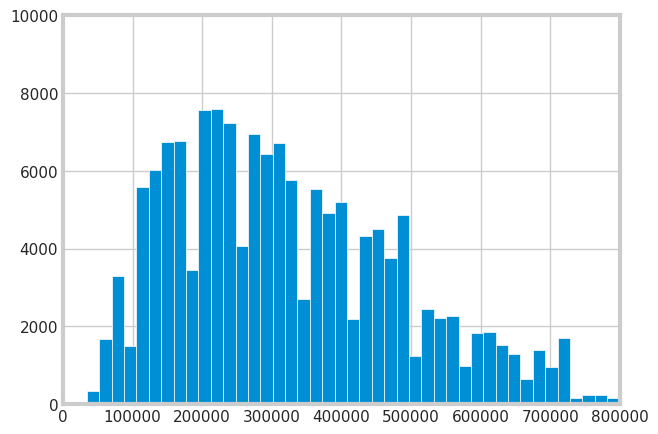

In [ ]:
df1['loan_amount'].hist(bins=200, edgecolor = "white")
#abajo, arriba = ylim() # devuelve el ylim actual
#ylim((0, 10000)) # establece el ylim en abajo, arriba
#ylim(0, 10000) # establece el ylim en abajo, arriba

plt.ylim(0, 10000)
plt.xlim(0, 800000)
plt.show()

In [ ]:
type('loan_amount')

str

In [ ]:
media_loan = df1['loan_amount'].mean()
media_loan

331117.7439967714

In [ ]:
std_loan = df1['loan_amount'].std()
std_loan

183909.3101270855

In [ ]:
(116500-media_loan)/std_loan

-1.1669759614043773

In [ ]:
# Convertir a z score
datos_zscore2=pd.DataFrame()
for j in Base_Zscore.columns[2:3]:
   datos_zscore2[j] = (df1[j] - df1[j].mean()) / df1[j].std()

datos_zscore2.head()

,loan_amount
0,-1.166976
1,-0.677604
2,0.409888
3,0.681761
4,1.986752


In [ ]:
datos_zscore2['Valor_tipo']= datos_zscore2['loan_amount'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_zscore2.head(10)

,loan_amount,Valor_tipo
0,-1.166976,Normal
1,-0.677604,Normal
2,0.409888,Normal
3,0.681761,Normal
4,1.986752,Normal
5,2.041127,Atipico
6,0.083640,Normal
7,-0.351357,Normal
8,0.246764,Normal
9,0.573012,Normal


(-4.0, 5.0)

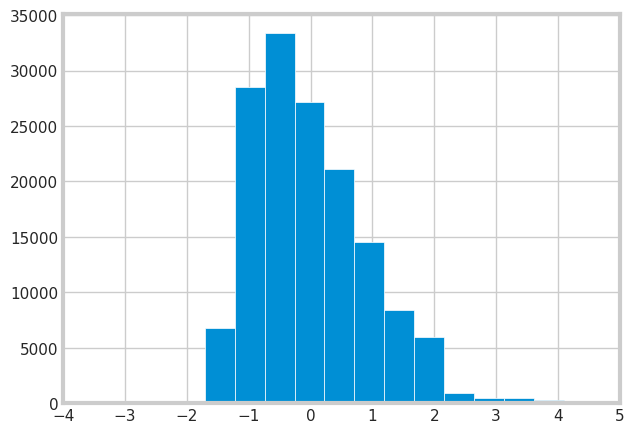

In [ ]:
datos_zscore2['loan_amount'].hist(bins=40, edgecolor = "white")
#plt.ylim(0, 65000)
plt.xlim(-4, 5)

## Representación del valor de las propiedades de los prestatarios aplicando el Método Z Score

(0.0, 2500000.0)

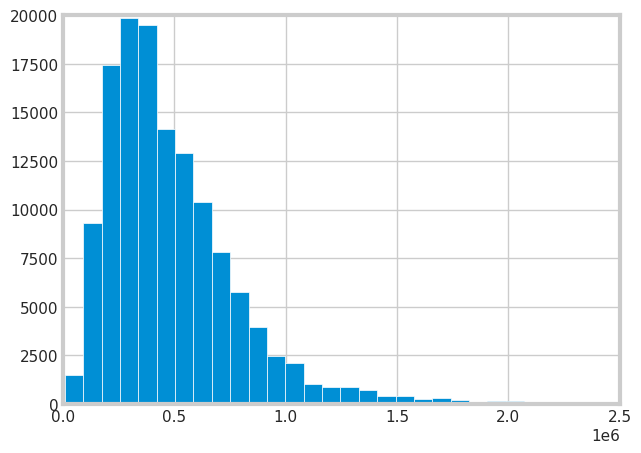

In [ ]:
df1['property_value'].hist(bins=200, edgecolor = "white")
plt.ylim(0, 20000)
plt.xlim(0, 2500000)

In [ ]:
type('property_value')

str

In [ ]:
media_property = df1['property_value'].mean()
media_property

497893.46569640347

In [ ]:
std_property = df1['property_value'].std()
std_property

359935.31556194386

In [ ]:
(118000.0-media_property)/std_property

-1.0554492689979593

In [ ]:
# Convertir a z score
datos_zscore=pd.DataFrame()
for j in Base_Zscore.columns[3:4]:
  datos_zscore[j] = (df1[j] - df1[j].mean()) / df1[j].std()
datos_zscore.head()

,property_value
0,-1.055449
1,NaN
2,0.028079
3,0.444820
4,0.722648


In [ ]:
datos_zscore['Valor_tipo']= datos_zscore['property_value'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_zscore.head(10)

,property_value,Valor_tipo
0,-1.055449,Normal
1,NaN,Normal
2,0.028079,Normal
3,0.444820,Normal
4,0.722648,Normal
5,1.417217,Normal
6,-0.166401,Normal
7,-0.527577,Normal
8,-0.055270,Normal
9,0.528169,Normal


(-4.0, 5.0)

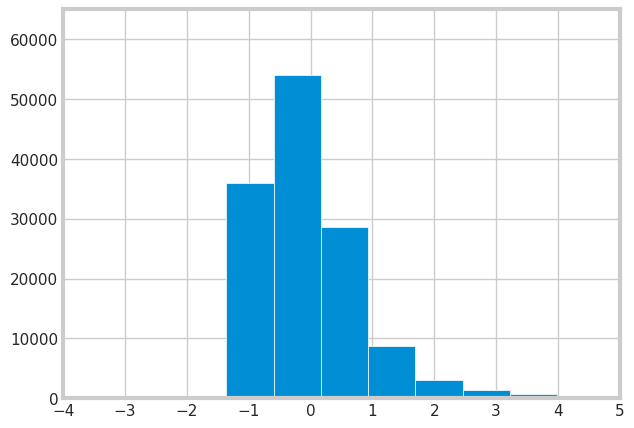

In [ ]:
datos_zscore['property_value'].hist(bins=60, edgecolor = "white")
plt.ylim(0, 65000)
plt.xlim(-4, 5)

## Representación de los ingresos de los prestatarios aplicando el Método Z Score

(0.0, 150000.0)

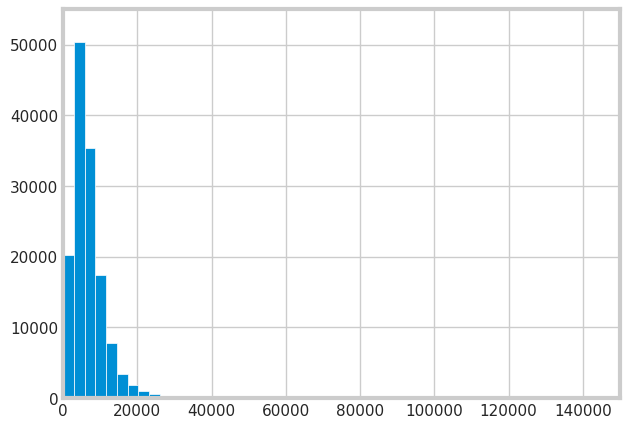

In [ ]:
df1['income'].hist(bins=200, edgecolor = "white")
plt.ylim(0, 55000)
plt.xlim(0, 150000)

In [ ]:
type('income')

str

In [ ]:
media_income = df1['income'].mean()
media_property

497893.46569640347

In [ ]:
std_income = df1['income'].std()
std_property

359935.31556194386

In [ ]:
(1740.0-media_income)/std_income

-0.8030892793830176

In [ ]:
# Convertir a z score
datos_zscore3=pd.DataFrame()
for j in Base_Zscore.columns[7:8]:
  datos_zscore3[j] = (df1[j] - df1[j].mean()) / df1[j].std()
datos_zscore3.head()

,income
0,-0.803089
1,-0.304366
2,0.388306
3,0.757730
4,0.536076


In [ ]:
datos_zscore3['Valor_tipo']= datos_zscore3['income'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_zscore3.head(10)

,income,Valor_tipo
0,-0.803089,Normal
1,-0.304366,Normal
2,0.388306,Normal
3,0.757730,Normal
4,0.536076,Normal
5,0.480662,Normal
6,-0.295130,Normal
7,-0.489078,Normal
8,-0.212010,Normal
9,-0.036533,Normal


(-4.0, 5.0)

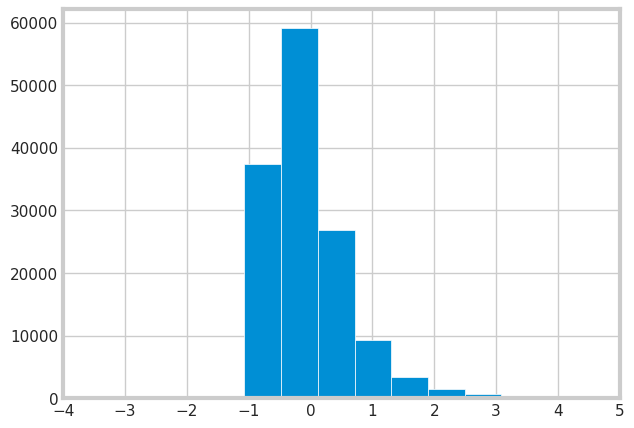

In [ ]:
datos_zscore3['income'].hist(bins=150, edgecolor = "white")
#plt.ylim(0, 65000)
plt.xlim(-4, 5)

## **Análisis de la distribución de los préstamos otorgados**

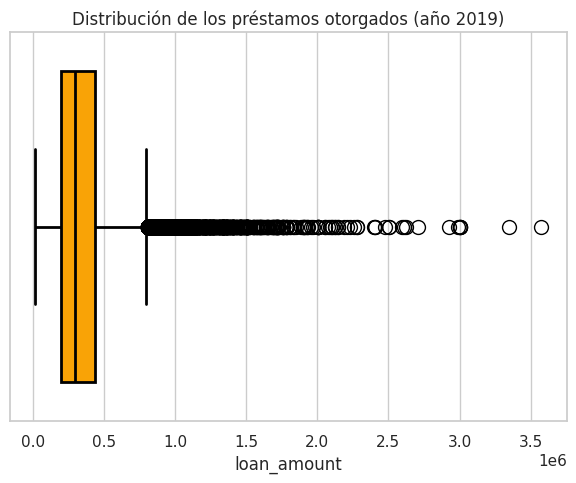

In [ ]:
sns.set_theme(style="whitegrid")
#sns.boxplot(data=df1, x="loan_amount")
ax = sns.boxplot(x=df1["loan_amount"], linecolor='black', color= 'orange', fliersize = 10, linewidth = 2, saturation = 0.95)
plt.title("Distribución de los préstamos otorgados (año 2019)")
plt.show()

En el gráfico podemos observar muchos outliers, estos son puntos de datos que se alejan significativamente del resto de observaciones en un conjunto de datos, los outliers pueden tener un gran impacto sobre los resultados de los análisis estadísticos al afectar medidas sensibles a los valores extremos, como la media y la desviación estándar.

 Una vez identificados, debemos decidir qué hacer con ellos.
 Existen diferentes métodos para gestionarlos, uno de ellos es la winsorización.   

La winsorización es una técnica que reemplaza los valores atípicos por el valor más cercano que no se considera un outlier según ciertos criterios.

Por ejemplo, podemos reemplazar los valores atípicos por el valor del percentil 95 o 5 más cercano, reduciendo el efecto de los outliers sin eliminarlos por completo.

 A continuación veremos la distribución aplicando el mètodo de Winsorización

In [ ]:
from scipy.stats.mstats import winsorize

df1_winsorized = df1.copy()
df1_winsorized['loan_amount'] = winsorize(df1_winsorized['loan_amount'],\
  limits = [0.05, 0.05], inplace = True)

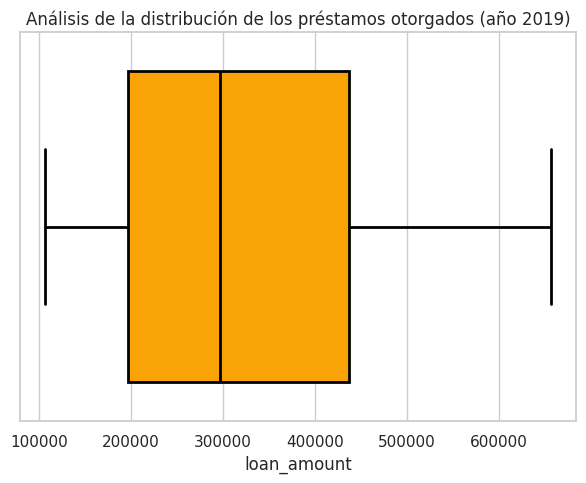

In [ ]:
sns.set_theme(style="whitegrid")
#sns.boxplot(data=df1_winsorized, x="loan_amount")
ax = sns.boxplot(x=df1_winsorized["loan_amount"], linecolor='black', color= 'orange', fliersize = 10, linewidth = 2, saturation = 0.95)
plt.title("Análisis de la distribución de los préstamos otorgados (año 2019)")
plt.show()

## **Análisis de la distribución de los préstamos otorgados según la región**

In [ ]:
sns.boxplot?

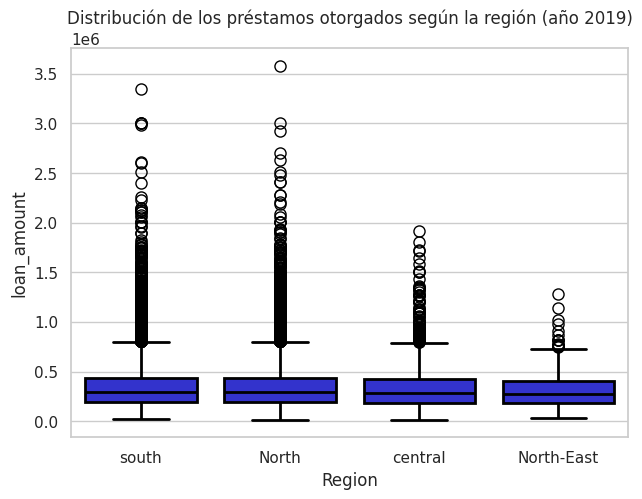

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Region', y='loan_amount', data=df1, linecolor='black', fliersize = 8, linewidth = 2, saturation = 0.60, color= 'blue')
plt.title("Distribución de los préstamos otorgados según la región (año 2019)")
plt.show()

Al igual que el caso anterior entontramos muchos outliers por ende aplicamos el método de Winsorización nuevamente.

In [ ]:
from scipy.stats.mstats import winsorize

df1_winsorized2 = df1.copy()
df1_winsorized2['loan_amount'] = winsorize(df1_winsorized['loan_amount'],\
  limits = [0.05, 0.05], inplace = True)

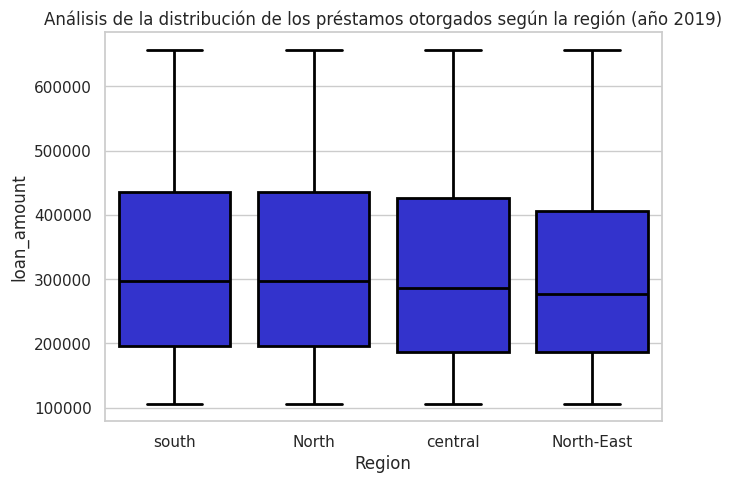

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Region', y='loan_amount', data=df1_winsorized2, linecolor='black', fliersize = 8, linewidth = 2, saturation = 0.60, color= 'blue')
plt.title("Análisis de la distribución de los préstamos otorgados según la región (año 2019)")
plt.show()

## **Relación entre el monto de préstamo otorgado y los ingresos de los clientes**

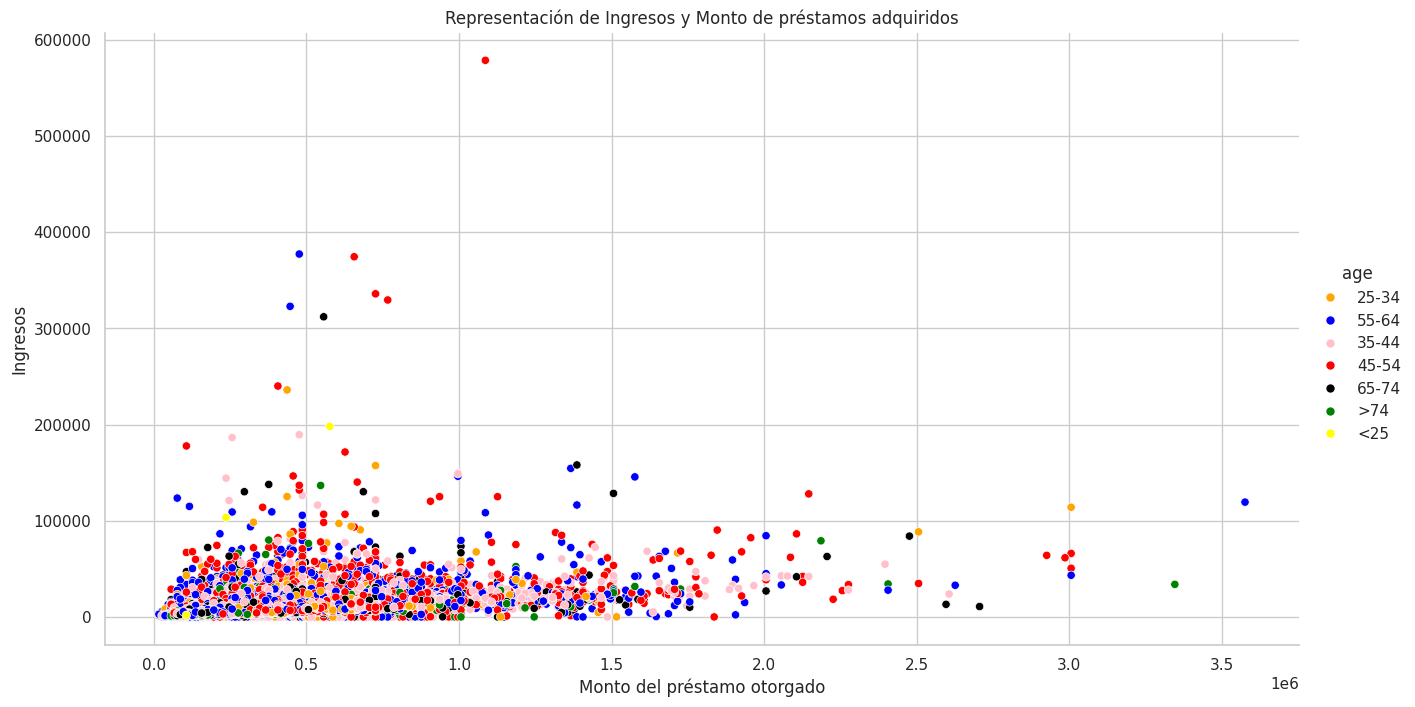

In [ ]:
colores = {'<25': 'yellow', '>74': 'green', '25-34': 'orange', '35-44': 'pink', '45-54': 'red', '55-64': 'blue', '65-74': 'black' }
ax= sns.relplot(x = "loan_amount", y = "income", hue = "age", palette=colores, height = 7, aspect = 1.9, data = df1)
ax.set(xlabel='Monto del préstamo otorgado', ylabel='Ingresos', title='Representación de Ingresos y Monto de préstamos adquiridos')
plt.show()


En el siguiente gráfico se reprentan las mismas variables que el anterior pero trazamos la recta de regresión.

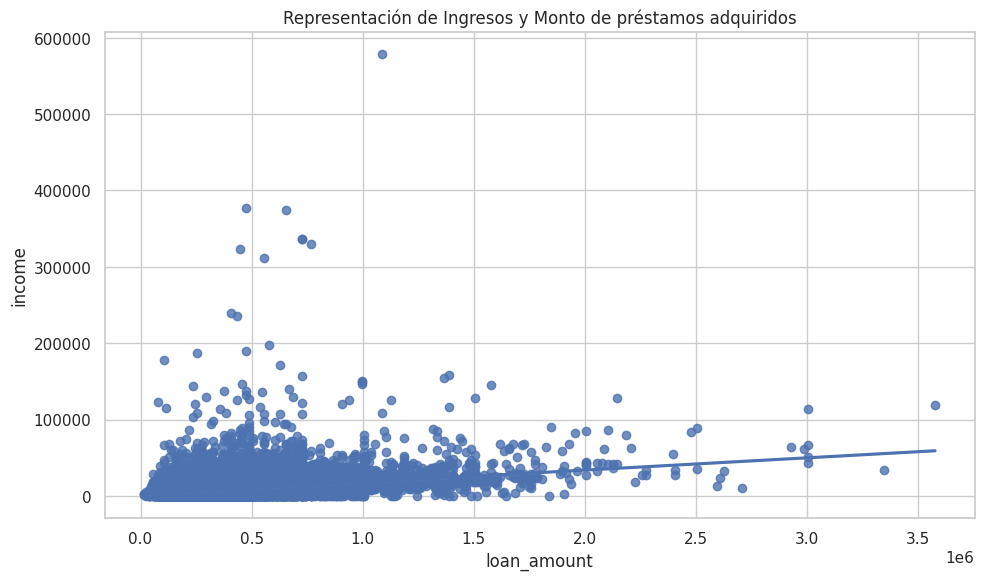

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df1, x='loan_amount', y='income')
plt.title("Representación de Ingresos y Monto de préstamos adquiridos")
plt.show()

## **Análisis del rango etario**

A continuación veremos un gráfico de torta que representa al rango etario en funciòn de la cantidad de préstamos que le fueron otorgados respecto del total de los mismos, el mismo posee una gráfica circular dividido en sectores, que ilustran magnitudes o frecuencias relativas expresadas en porcentajes.

In [ ]:
#número entero que indica cuántos valores distintos (o elementos) contiene una columna.
#Focalizo en la variable Age
df1.nunique()

,0
ID,148670
year,1
loan_limit,2
Gender,4
approv_in_adv,2
loan_type,3
loan_purpose,4
Credit_Worthiness,2
open_credit,2
business_or_commercial,2


In [ ]:
#Agrupo y cuento en funcion de la variable Age
df1.groupby("age").size()

,0
age,
25-34,19142
35-44,32818
45-54,34720
55-64,32534
65-74,20744
<25,1337
>74,7175


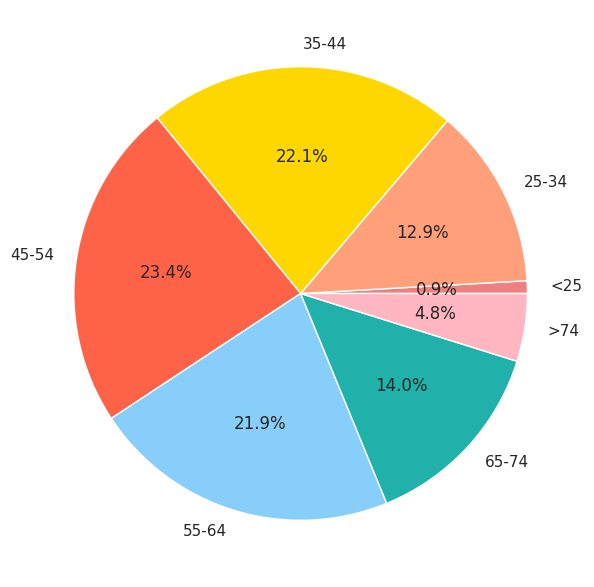

In [ ]:
#Una vez obtenidos los datos del rango etario lo grafico
rango_etario = ['<25', '25-34', '35-44',
        '45-54', '55-64', '65-74', '>74']

data = [1337, 19142, 32818, 34720, 32534, 20744, 7175]
colores = ["#F08080","#FFA07A","#FFD700","#FF6347", "#87CEFA", "#20B2AA", "#FFB6C1", "#90EE90"]
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(data, labels = rango_etario, autopct='%1.1f%%',  colors=colores)
plt.show()

**Conclusión**: los clientes de entre 35 y 65 años conforman aproximadamente un 68%  de los préstamos otorgados.

## **Distribución de los ingresos de los clientes**

(0.0, 500000.0)

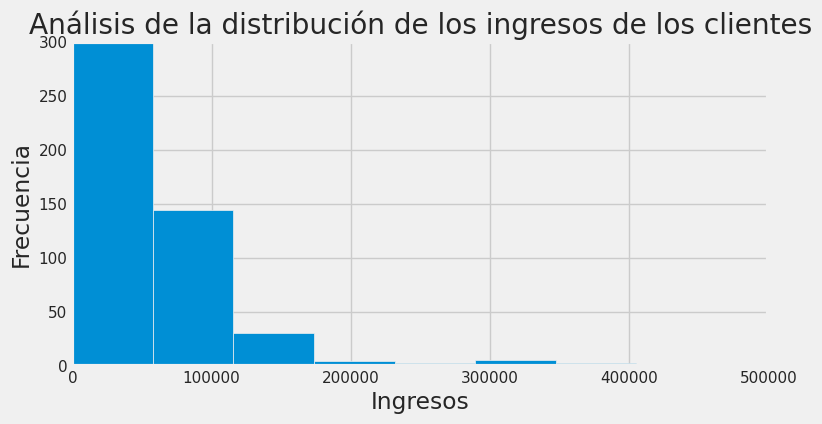

In [ ]:
df2=df1.copy()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(x= df2.income, bins=None,  density=False, orientation='vertical')
ax.set_xlabel('Ingresos')
ax.set_ylabel('Frecuencia')
ax.set_title('Análisis de la distribución de los ingresos de los clientes')
#Establezco los límites de los ejes X e Y para poder visualizar mejor la distribuciòn
plt.ylim(0, 300)
plt.xlim(0, 500000)

**Aclaración**: Cabe destacar que acorté el rango del eje Y dado que visualmente era muy complejo de analizar, de esta forma la imágen es más clara.

## **Relación entre el monto de préstamo otorgado y el ratio de la tasa de interés**



<ipython-input-362-4c88b1c44583>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x = "loan_amount", y = "rate_of_interest", palette=colores, height = 6, aspect = 1.7, data = df1);


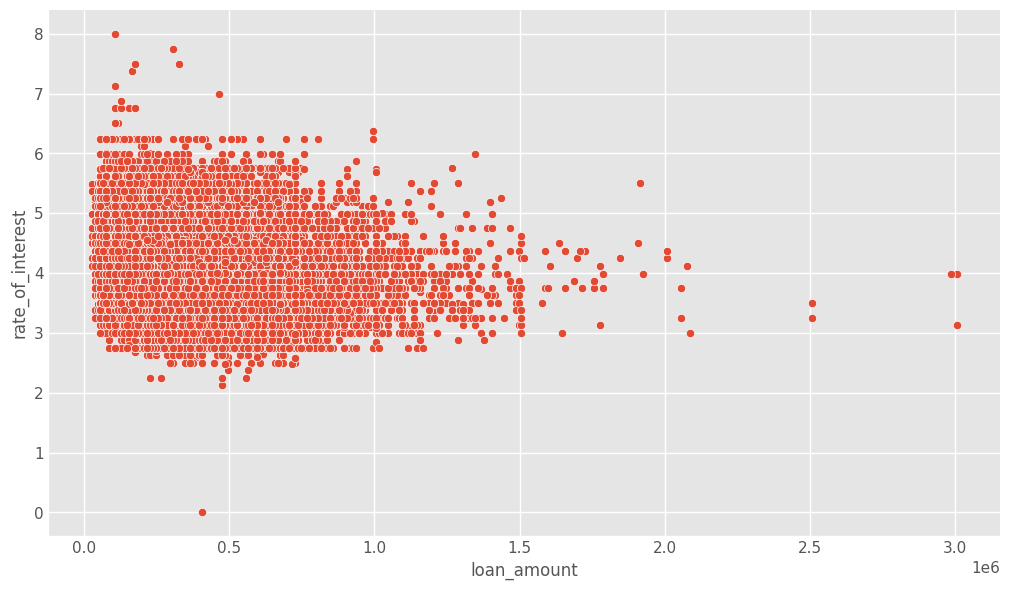

In [ ]:
plt.style.use('ggplot')
sns.relplot(x = "loan_amount", y = "rate_of_interest", palette=colores, height = 6, aspect = 1.7, data = df1);
plt.show()

## **Relación entre el Tipo de préstamo y el Monto de los préstamos**

En este caso veremos 2 gráficos, el primero representa la distribucion del Tipo de préstamo en función del monto otorgado.
El segundo gráfico brinda información análoga al anterior pero en este caso reflaja las cantidades de préstamos otorgados por cada tipo de préstamo. Podemos ver que se otorgan en gran mayoria los prestamos catalogados de Tipo 1, el mismo corresponde a una previa segmentacion de clientes que reunen requisitos y atributos similares.

In [ ]:
df1.groupby("loan_type").size()

,0
loan_type,
type1,113173
type2,20762
type3,14735


In [ ]:
df2['loan_amount'].describe()

,loan_amount
count,1.486700e+05
mean,3.311177e+05
std,1.839093e+05
min,1.650000e+04
25%,1.965000e+05
50%,2.965000e+05
75%,4.365000e+05
max,3.576500e+06


In [ ]:
df3 = df1[['loan_type', 'loan_amount']].copy()
df3.head()

,loan_type,loan_amount
0,type1,116500
1,type2,206500
2,type1,406500
3,type1,456500
4,type1,696500


In [ ]:
print(df3.groupby('loan_type')['loan_amount'].sum().head())

loan_type
type1    38884764500
type2     5334623000
type3     5007887500
Name: loan_amount, dtype: int64


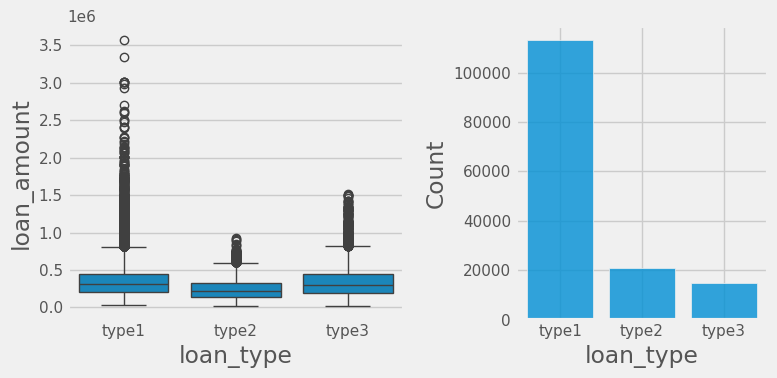

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(data=df3, x="loan_type", y="loan_amount", ax=axs[0])
sns.histplot(data=df1, x="loan_type", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

# **Estructurando el proyecto**



In [ ]:
# Convierto los nombres de las columnas a minúscula
df=df1.copy()
df.columns=df.columns.str.lower()
df.head(1)


,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0


In [ ]:
# Convierto la coluna ID a Str
df['id'] = df['id'].astype(str)


In [ ]:
# Dropeo la variable year, toda la columna indica como unico año 2019 (no aporta)
#( inplace = true realiza la operación de eliminado sobre el mismo DataFrame, en lugar de crear y devolver uno nuevo)
df.drop(columns=['year'], inplace=True)
df.head(1)

,id,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0


## **Observamos los valores nulos**

In [ ]:
# count de valores nulos
nulls = df.isna().sum()
print(nulls)


id                               0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                 

La función matrix de **Missingno** permite visualizar concretamente dónde se encuentran los valores nulos en un conjunto de datos

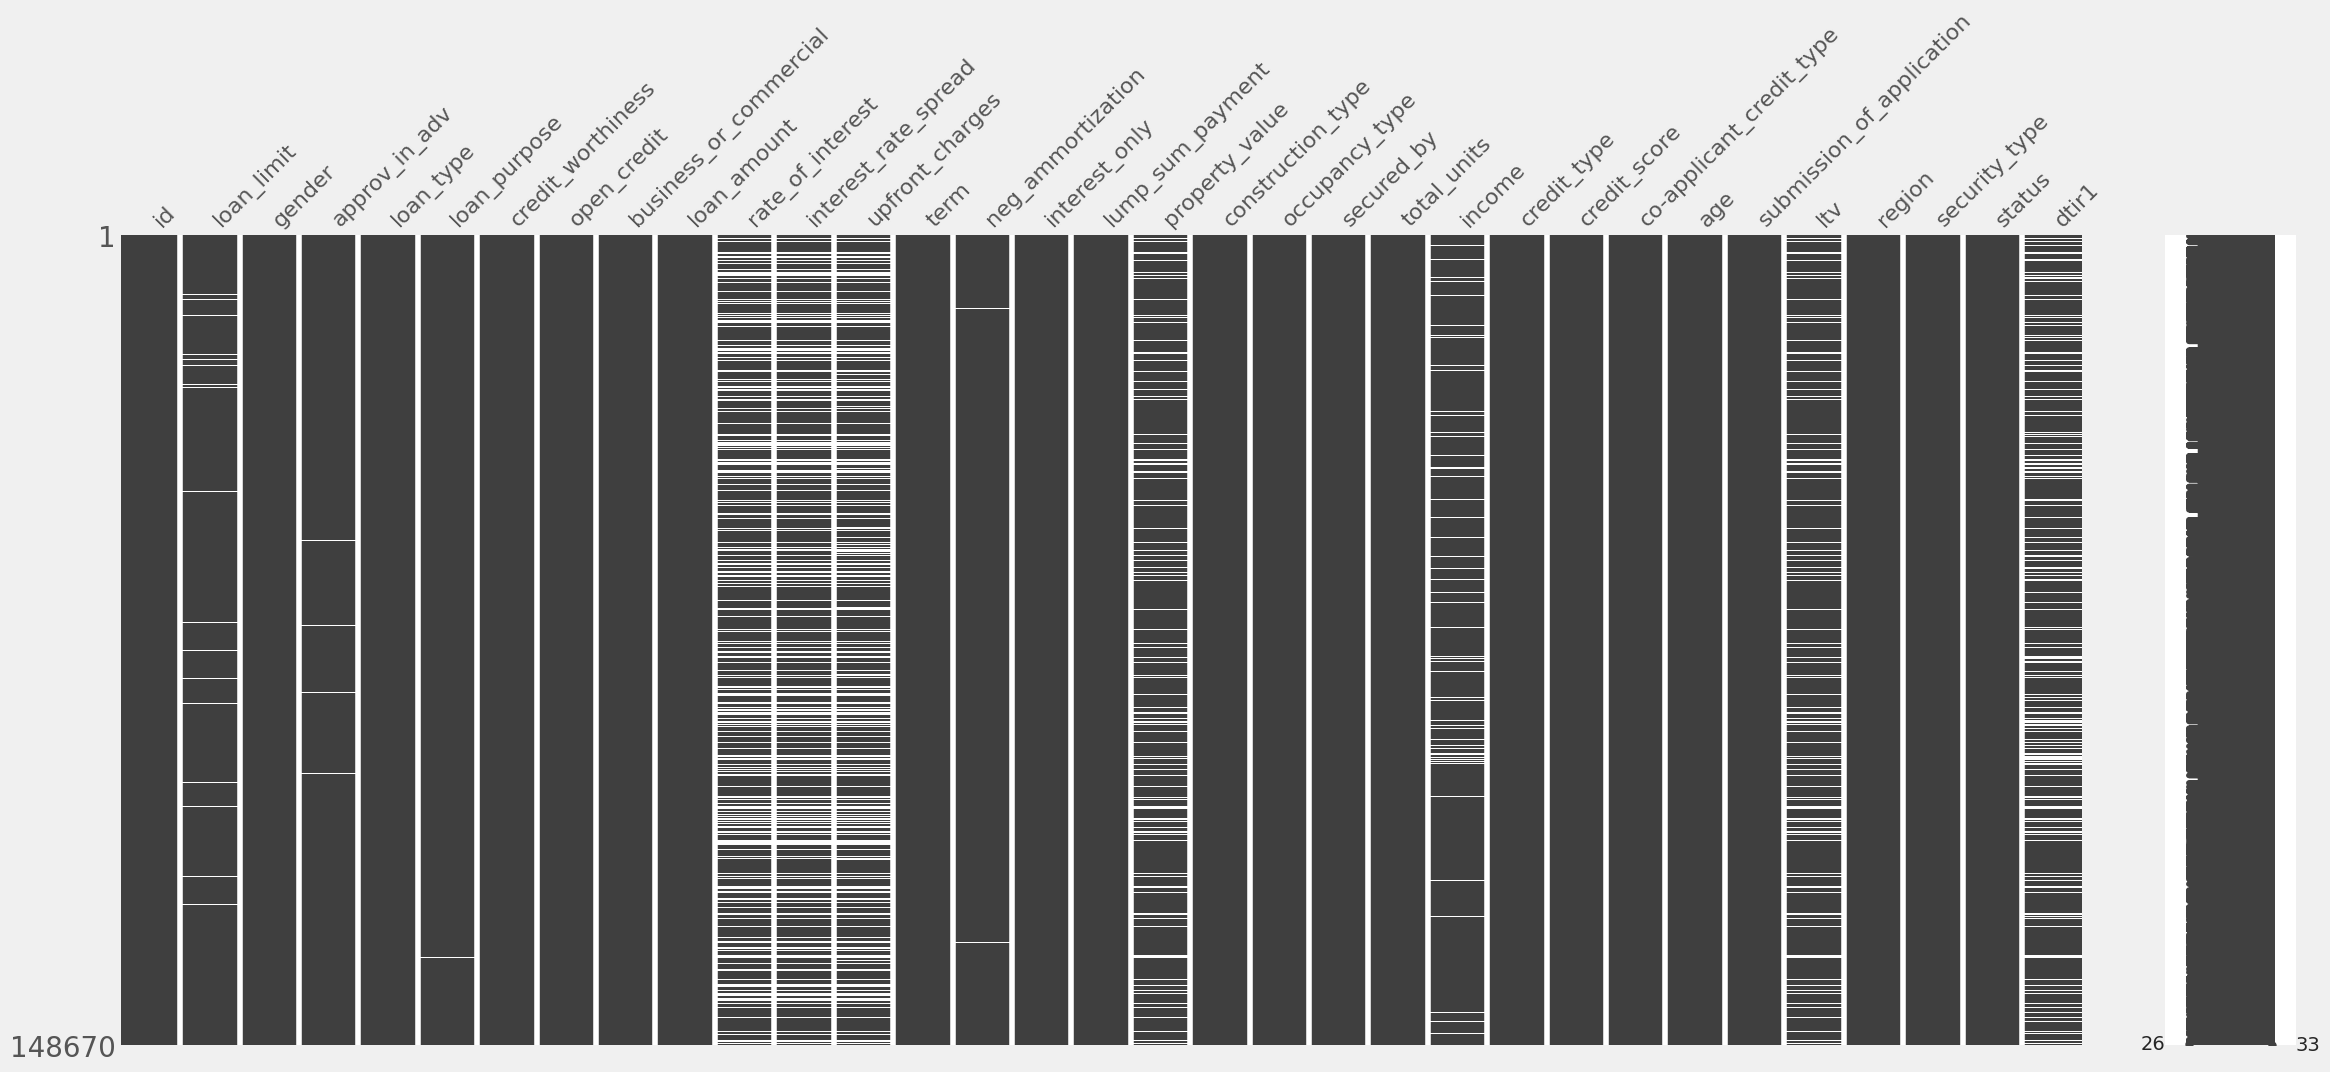

<Figure size 1000x500 with 0 Axes>

In [ ]:
# visualizo valores nulos en gràfico
msno.matrix(df)
plt.figure(figsize = (10,5))
plt.show()

Como podemos ver, la myoria de los campos que poseen gran parte de nulos corresponden a variables numericas. Trabajaremos sobre ello más adelante, para así conseguir tener una base limpia.

<Axes: >

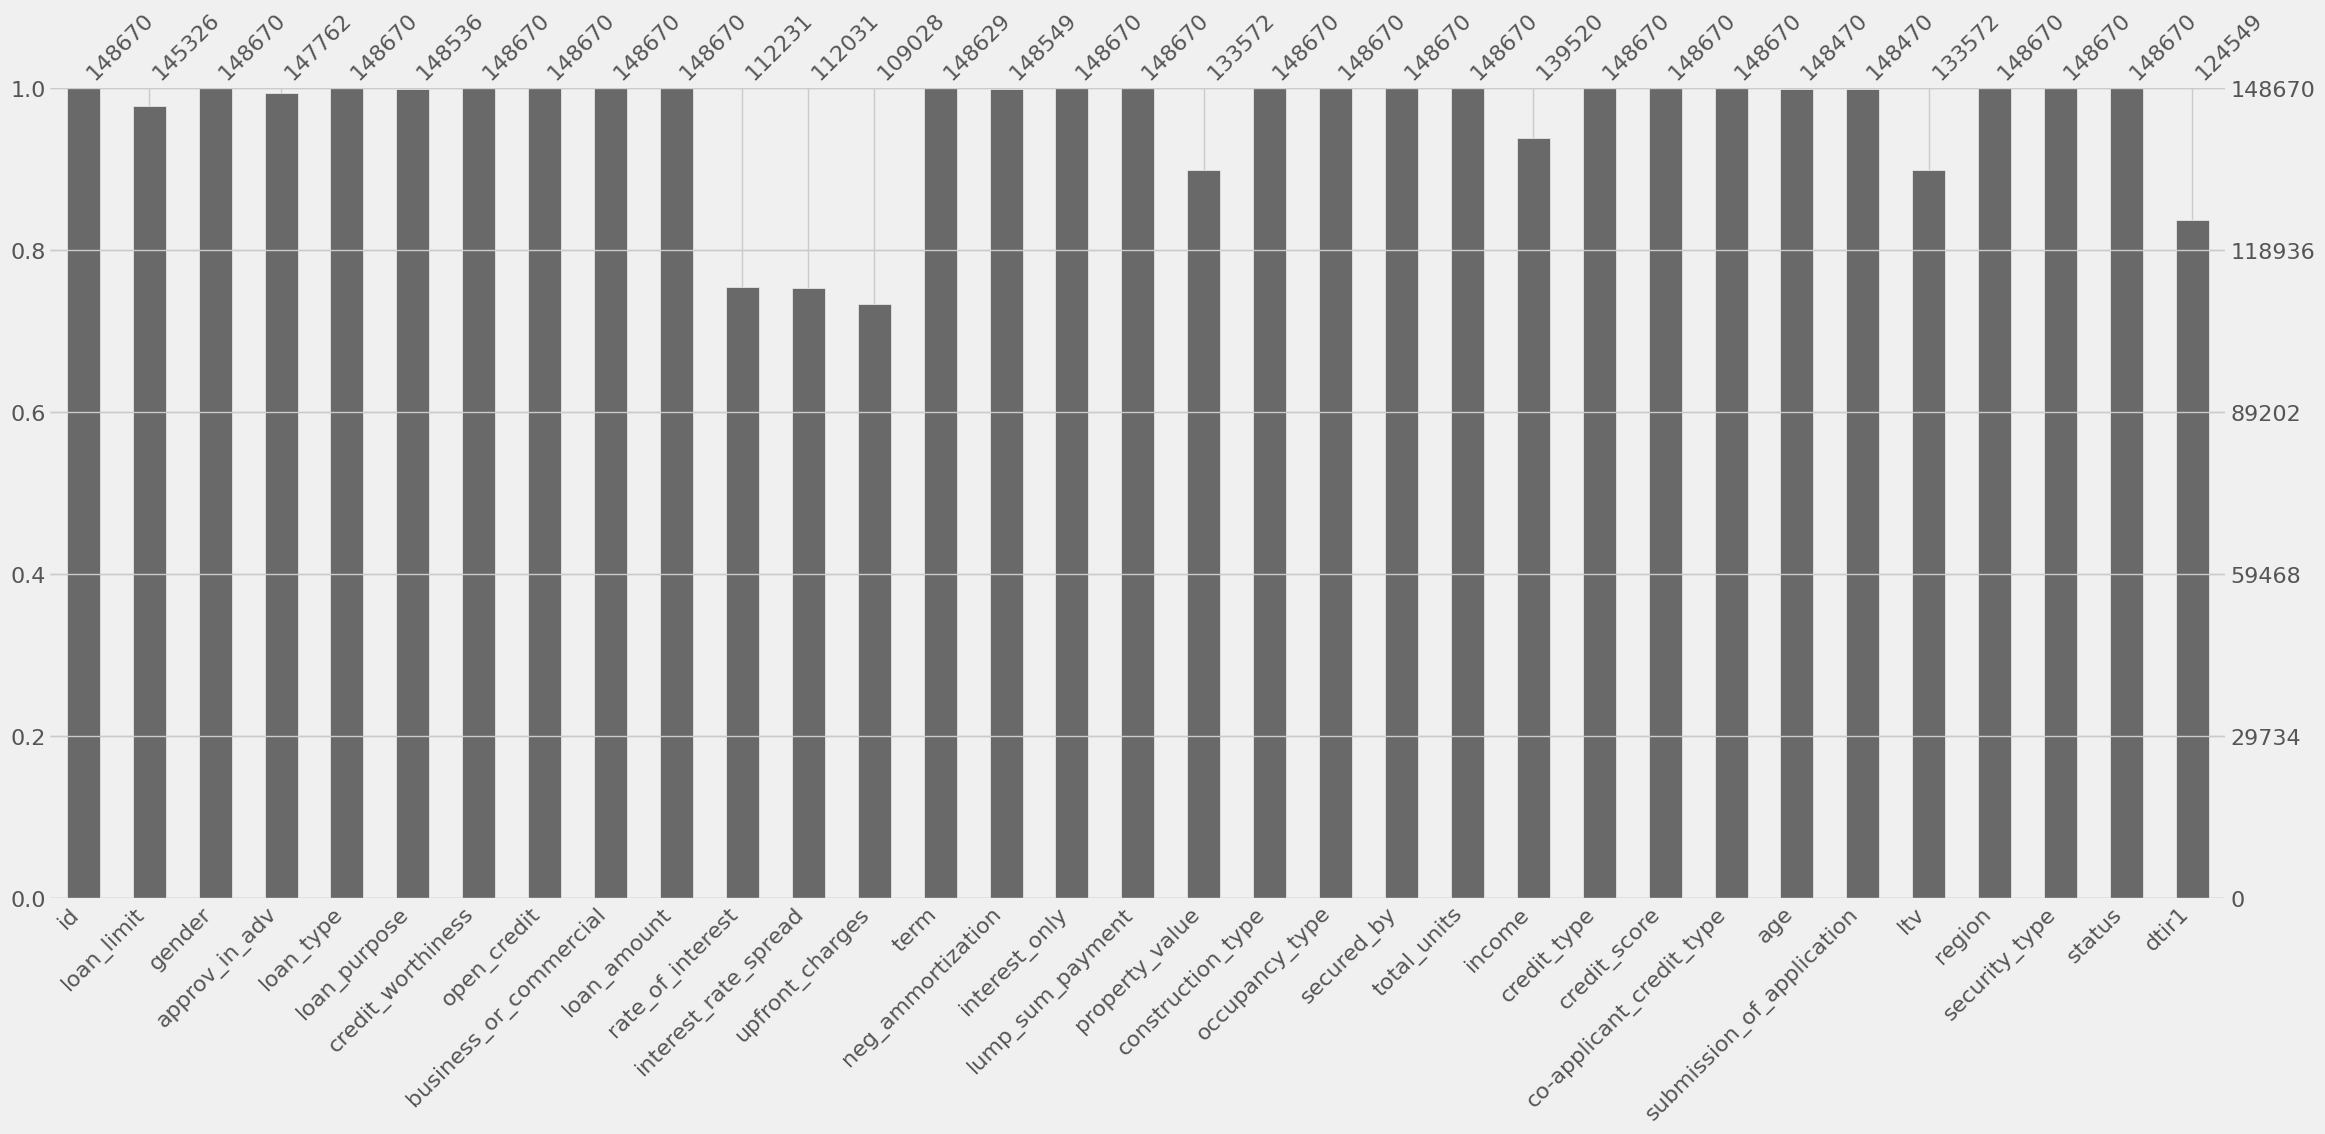

In [ ]:
#otra manera de visualizar los NULLS
msno.bar(df)

## **Evalúo la correlación de los valores faltantes**

Compruebo si existe correlación entre los valores faltantes. Para esto se puede usar la función **heatmap()**

<Axes: >

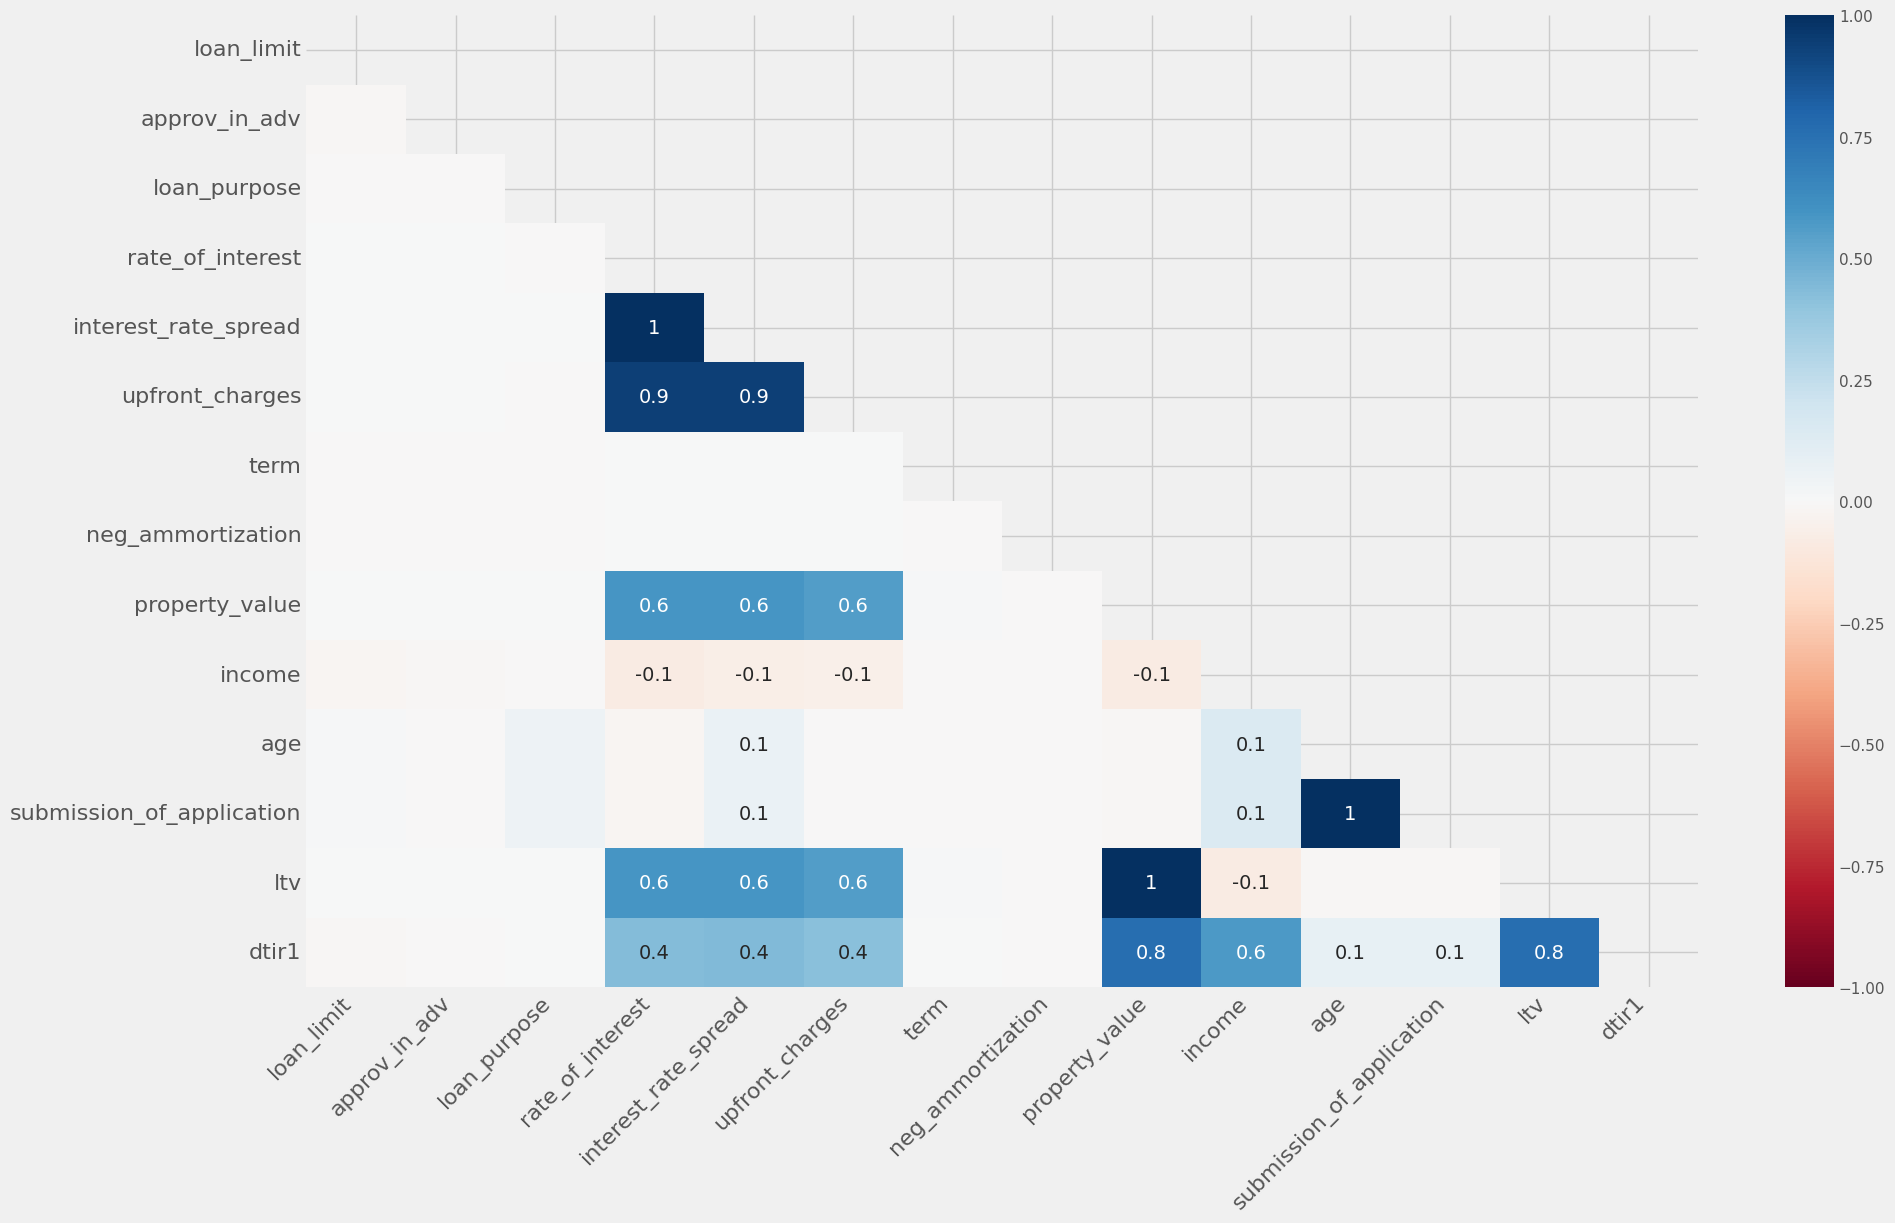

In [ ]:
msno.heatmap(df)

En esta gráfica se puede ver fácilmente el nivel de correlación entre los valores nulos de las diferentes features. En la barra de la derecha se muestra el nivel de correlación positiva entre dos valores, el mismo se indica mediante la intensidad de azul.


A modo de ejemplo, se puede observar gran correlacion entre la variable property_value' (valor de la propiedad) y 'LTV (1), lo cual no es casual dado que el ratio loan to value (LTV), o relación valor-préstamo se usa habitualmente en trámites hipotecarios para medir el porcentaje entre la cantidad del préstamo y el valor del inmueble que se utiliza como garantía.
De esta manera se permite examinar el riesgo hipotecario,es una perspectiva del negocio hipotecario de las entidades bancarias en el que, cuanto menor sea el LTV, mejor será la calidad del préstamo y menor riesgo de morosidad existirá.

Entre otras correlaciones se puede visualizar la fuerte asociacion entre `property_value' y 'DTIR` (de un 0.80), lo cual tampoco es casual, ya que la primera hace referencia al valor de la propiedad y la segunda a la tasa interna de retorno (TIR), es un indicador que permite conocer la rentabilidad de un proyecto, mediante el cálculo de la diferencia entre los gastos actuales y los ingresos proyectados en el futuro, con el fin de estimar las ganancias esperadas de una inversión.
La TIR dará información acerca del costo real de indisponer al banco de los recursos que el cliente consumirá o invertirá para su bienestar actual o futuro

### Continuo identificando valores nulos para así trabajarlos


Como vimos anteriormente tenemos bastantes columnas con valores nulos. Primero, creeo separo entre dataframe categorico y numerico, según el tipo de dato.

In [ ]:
# Armo un dataframe con la col Index con las respectivas features y su respectivo tipo de dato.
# A su vez diferencio variables cat de variables num para luego invocarlas en el proximo codigo de abajo

dtypes = pd.DataFrame(df.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)
dtypes.head(10)


,index,0
0,id,object
1,loan_limit,object
2,gender,object
3,approv_in_adv,object
4,loan_type,object
5,loan_purpose,object
6,credit_worthiness,object
7,open_credit,object
8,business_or_commercial,object
9,loan_amount,int64


Trabajo los datos numéricos. Podríamos completar los valores nulos utilizando la mediana de la columna, pero esto a menudo sesgará los datos, especialmente cuando faltan muchos valores. Una forma eficaz de completar valores NaN para datos numéricos es utilizar KNNImputer de sklearn, el mismo utiliza las columnas que tienen valores para estimar el valor nulo de una determinada celda.


In [ ]:
# # Dataframe numérico (armo otro dataframe para no pisar el original donde invoco SOLO las variables numéricas)
df_num = df[num_vars]
df_num.head()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
0,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [ ]:
# Entreno y aplico KNN
# Fit(): aprende y estima los parametros de transformacion.
#Transform(): Aplica la transformación aprendida a los nuevos datos.
#Fit_transform(): Aprende los parámetros y aplica la transformación a los nuevos datos

knn = KNNImputer(n_neighbors = 3)
knn.fit(df_num)
X = knn.fit_transform(df_num)


In [ ]:
# Chequeo que no haya ningun NAN, de esa forma me aseguro que se haya ejecutado correctamente el método KNN
df_num = pd.DataFrame(X, columns=num_vars)
nas_num = df_num.isna().sum()
print(nas_num)

loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


Ahora trabajo los datos categóricos que faltan. Aquí tomaremos el valor más
probable (o el valor que aparece con más frecuencia) para esa columna. Una vez que se imputen todos los valores nulos, por ultimo concateno el dataframe numerico con el categorico

In [ ]:
#Imputando datos categoricos
df_cat = df[cat_vars]

for i in cat_vars:
    mode = df[i].mode()
    mode = mode[0]
    df_cat[i].fillna(value=mode, inplace=True)

# chequeo nulos
nas_cat = df_cat.isna().sum()
print(nas_cat)

# Combino dataframes
df_full = pd.concat([df_num, df_cat], axis=1, join='inner')

<ipython-input-380-1e27cec1dcd7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i].fillna(value=mode, inplace=True)


id                           0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
region                       0
security_type                0
dtype: int64


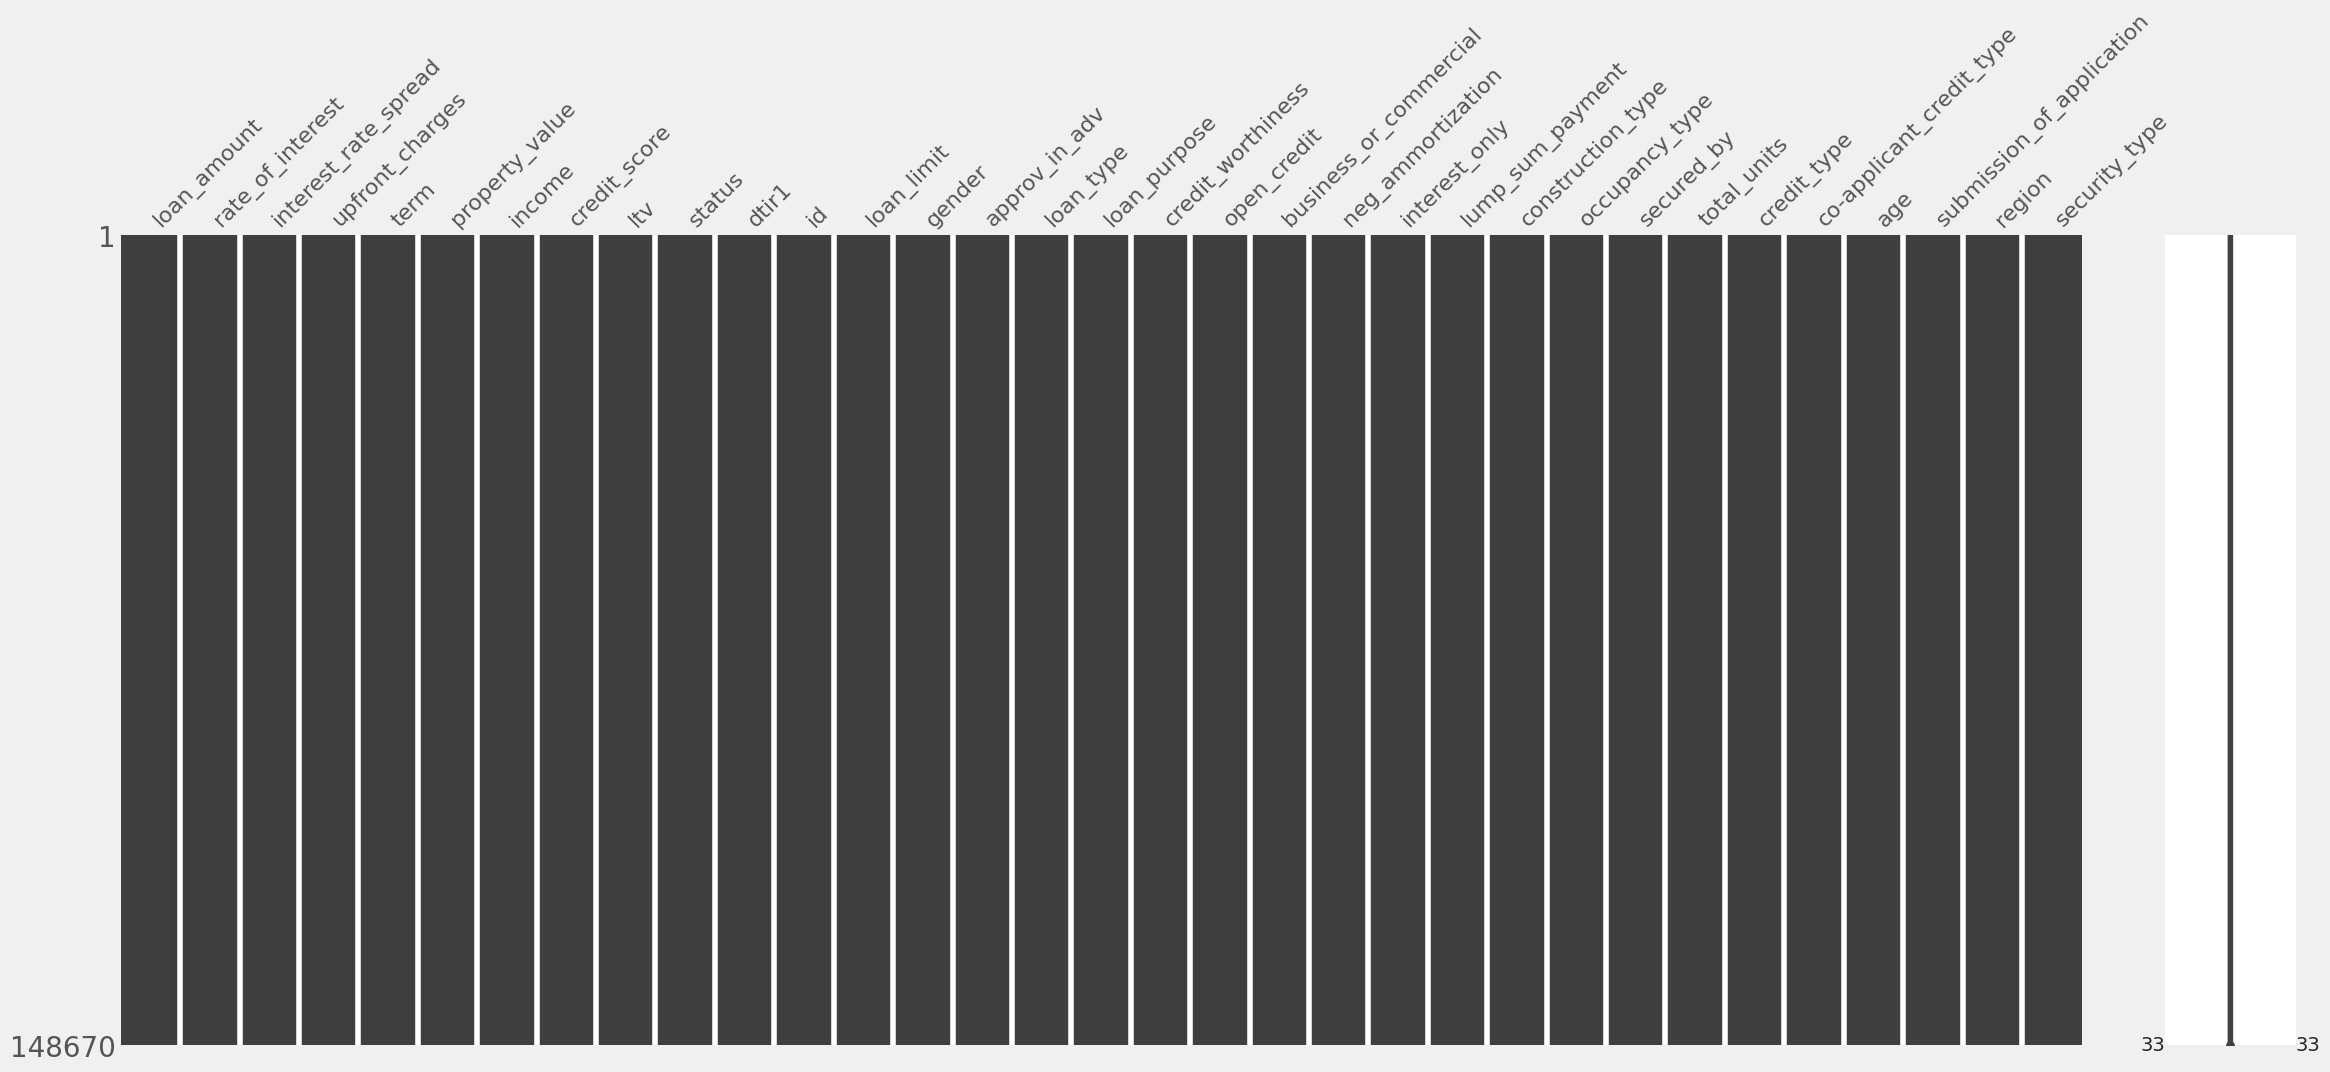

<Figure size 1500x900 with 0 Axes>

In [ ]:
# Chequeo que no haya nulls en el dataset
msno.matrix(df_full)
plt.figure(figsize = (15,9))
plt.show()

Efectivamente la base quedó limpia de valores nulos.



### **Outliers**

Método elegido para tratar outliers: Rango intercuartílico

se basa en el uso de los cuartiles de la variable para calcular límites inferiores y superiores. Para calcular estos límites primero es necesario calcular lo siguiente:

- Cuartil 1 (Q1)
- cuartil 3 (Q3)
- Rango intercuartílico (IQR)

IQR=(Q3−Q1)

El IQR es una medida de dispersión que nos muestra el 50% de los datos que se encuentran distribuidos en el centro de la distribución.
una vez calculado el IQR se deben calcular los limites superiores y límites inferiores que son los límites a partir de los cuales las observaciones se consideran outliers.

LimiteInferior=(Q1−1.5∗IQR)

LimiteSuperior=(Q3+1.5∗IQR)

In [ ]:
df_num = df_full[num_vars]

# Funcion para enontrar outliers
def find_outliers_IQR(col):
   Q1=col.quantile(0.25)
   Q3=col.quantile(0.75)
   IQR=Q3-Q1
   outliers = col[((col<(Q1-3*IQR)) | (col>(Q3+3*IQR)))]
   return(outliers)

In [ ]:
# `Funcion para enontrar la proporcion de nulos en una columna
def outlier_prop(outliers, col):
    outlier_size = len(outliers)
    return outlier_size / (len(col) + outlier_size)

# Termporary dataframe
df_temp = df_full.copy()

In [ ]:
# Tanto `term` como `status son valores atípicos del 15 al 20 % y pueden tratarse como variables categóricas.
df_temp['term'] = df_temp['term'].astype(str)
df_temp['status'] = df_temp['status'].astype(str)

In [ ]:
# Dataset de variables numericas y variables categoricas
dtypes = pd.DataFrame(df_temp.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [ ]:
# Obteniendo proporcion de outliers
outlier_props = []
cols = []
for i in num_vars:
    outliers = find_outliers_IQR(df_temp[i])
    cols.append(i)
    prop = outlier_prop(outliers, df_temp[i])
    outlier_props.append(prop)

outlier_props_df = pd.DataFrame([cols, outlier_props], index=['Variable', 'OutlierProp']).transpose()

In [ ]:
# Eliminando outliers
for col in num_vars:
    q1 = df_temp[col].quantile(0.25)
    q3 = df_temp[col].quantile(0.75)
    IQR = q3-q1
    lower = q1-3*IQR
    upper = q3+3*IQR
    df_temp = df_temp[(df_temp[col] < upper) & (df_temp[col] > lower)]

df_full = df_temp

In [ ]:
# Term (duración del plazo del préstamo)
term_vals = pd.DataFrame(df_full['term'].value_counts().reset_index())
print(term_vals.columns)


Index(['term', 'count'], dtype='object')


In [ ]:
# Elimina los `terms`que aparecen menos de 10 veces en el dataset
terms_to_drop = []
for l, i in zip(term_vals['count'], term_vals['term']):
    if l < 10:
        terms_to_drop.append(l)

for i in terms_to_drop:
    df_full = df_full[df_full['term'] != i]

In [ ]:
# Datos restantes
proportion_remaining = round(len(df_full) / len(df), 5)
proportion_dropped = round(1 - proportion_remaining, 2) * 100
dropped = len(df) - len(df_full)
print("Se han eliminado ", dropped, ' filas del dataset')
print("Equivale a un ", proportion_dropped, "del dataset original" )
print("La proporción del dataset restante es :  ", proportion_remaining)

Se han eliminado  4792  filas del dataset
Equivale a un  3.0 del dataset original
La proporción del dataset restante es :   0.96777


In [ ]:
# Paso la variable Term a categorica
df_full['term'] = df_full['term'].astype('float')

## **Clustering Jerárquico**

El dendrograma utiliza un algoritmo de agrupamiento jerárquico para agrupar variables entre sí según su correlación de nulidad (medida en términos de distancia binaria). En cada paso del árbol, las variables se dividen según qué combinación minimiza la distancia de los grupos restantes.

<Axes: >

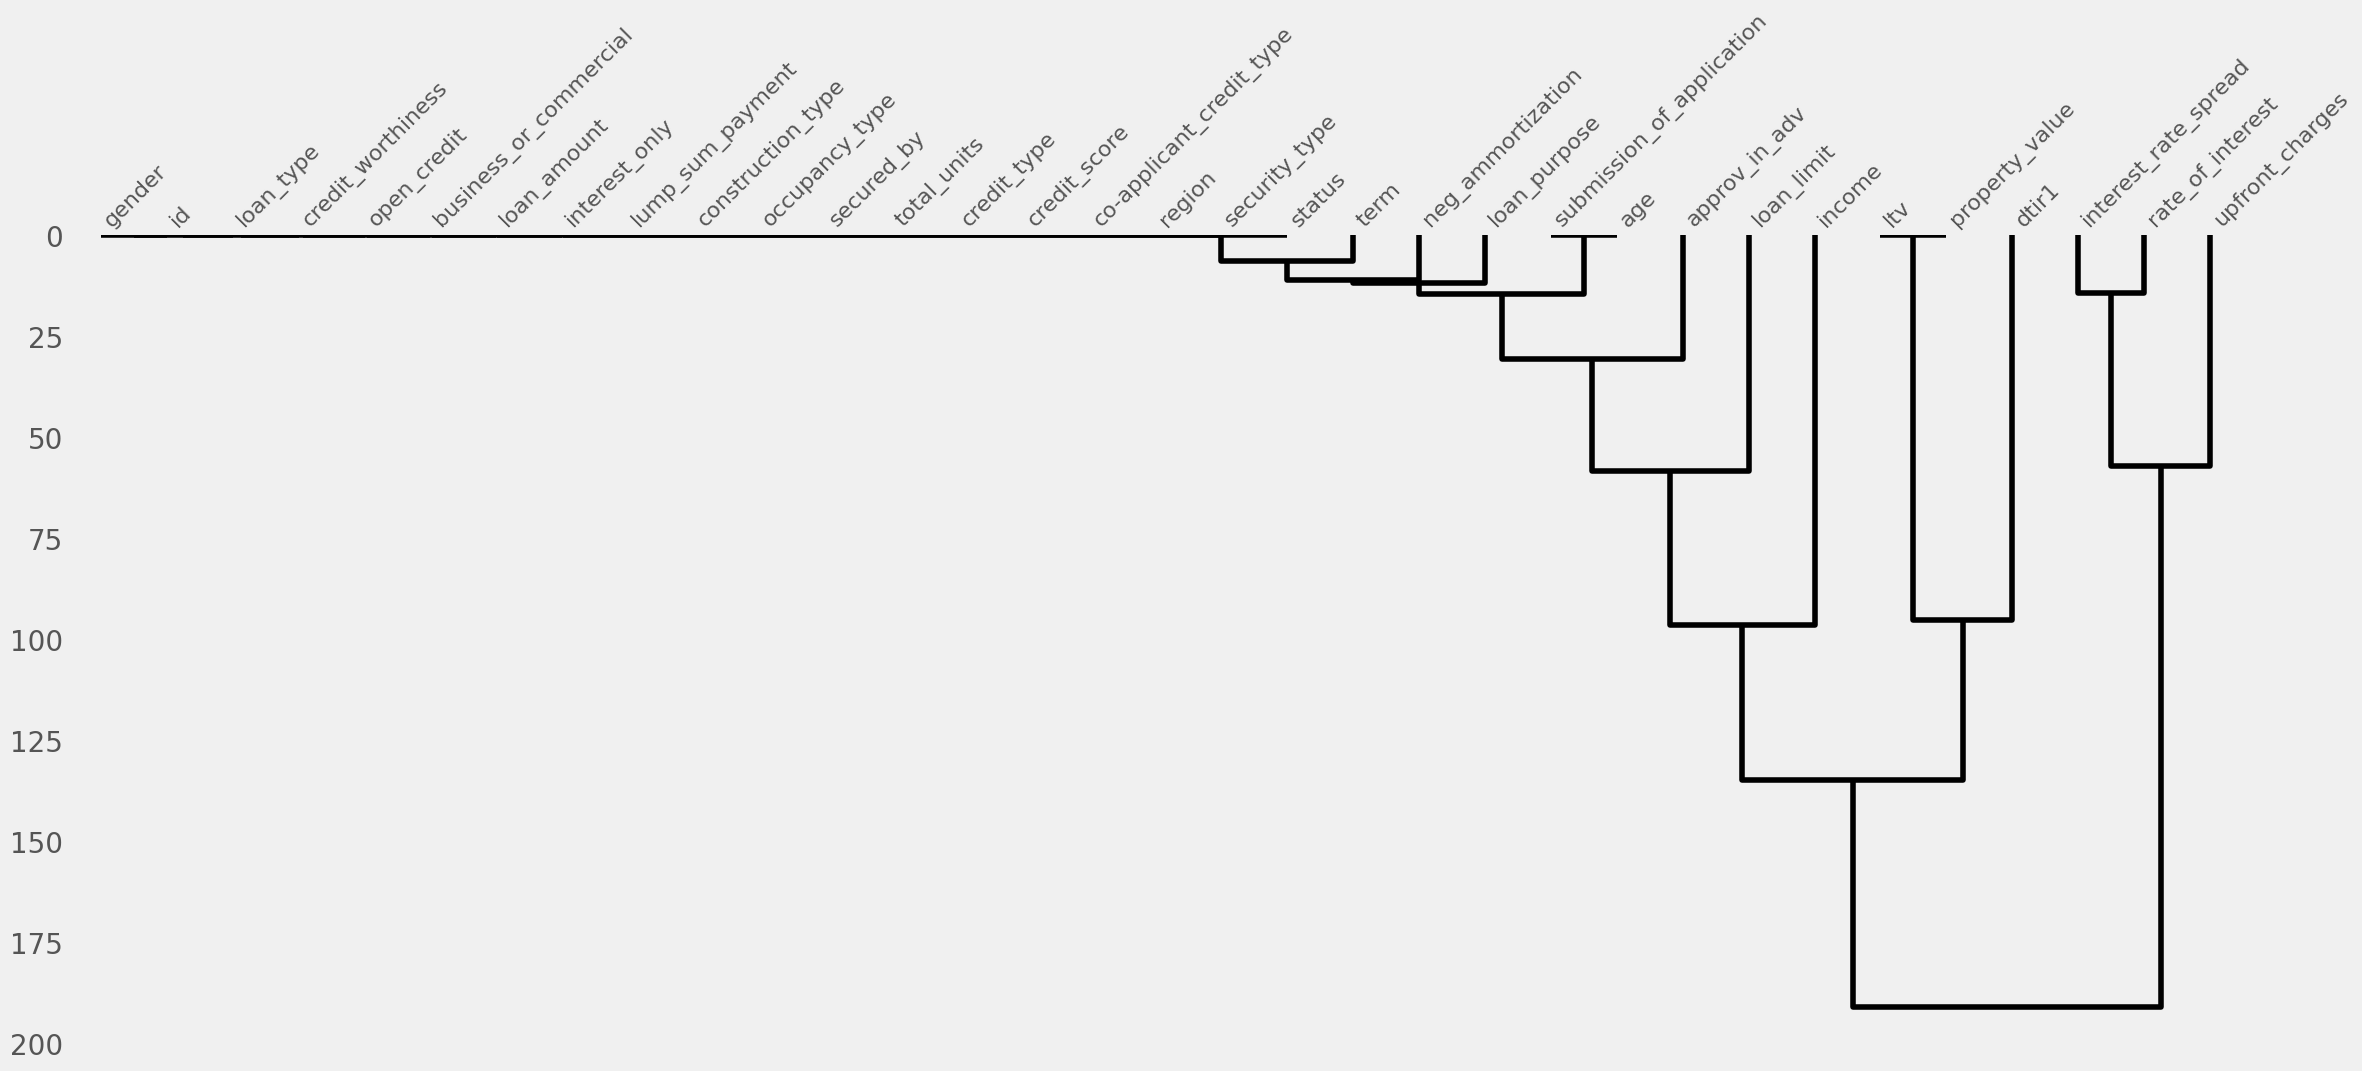

In [ ]:
msno.dendrogram(df)


## **PCA - Análisis de componentes principales**

En primer lugar hay que tener en cuenta que NO se pòdra realizar un correcto analisis de componentes principales si no se eliminan los nulos y tambien es de igual importancia saber que esta tecnica de reduccion de dimensiones requiere de un dataframe conformado por variables cuantitativas, ya sea continuas o discretas.

In [ ]:
df_num.head()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
0,116500.0,3.583333,-0.031267,1386.013333,360.0,118000.000000,1740.0,758.0,98.728814,1.0,45.000000
1,206500.0,3.708333,0.522967,1878.310000,360.0,251333.333333,4980.0,552.0,84.795549,1.0,34.666667
2,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,0.0,46.000000
3,456500.0,4.250000,0.681000,704.900000,360.0,658000.000000,11880.0,587.0,69.376900,0.0,42.000000
4,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,0.0,39.000000


In [ ]:
#Verifico que la cantidad de valores faltantes sea cero
df_num.isnull().sum().sum()

0

## Correlaciones entre variables

In [ ]:
df_corr=df_num.corr()

In [ ]:
df_corr.head(12)

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
loan_amount,1.000000,-0.151908,-0.372099,0.108967,0.174558,0.746450,0.459172,0.004438,0.042141,-0.036825,0.019109
rate_of_interest,-0.151908,1.000000,0.644600,-0.008271,0.143358,-0.085346,-0.035149,-0.002314,-0.039615,-0.244553,0.017310
interest_rate_spread,-0.372099,0.644600,1.000000,0.043249,-0.168477,-0.300089,-0.138457,-0.003339,0.006597,-0.153335,0.037814
upfront_charges,0.108967,-0.008271,0.043249,1.000000,-0.064309,0.110069,0.051603,-0.001183,-0.057950,-0.178734,-0.014773
term,0.174558,0.143358,-0.168477,-0.064309,1.000000,0.045053,-0.053684,-0.003147,0.105887,-0.000225,0.110905
property_value,0.746450,-0.085346,-0.300089,0.110069,0.045053,1.000000,0.424811,0.002654,-0.192499,-0.077066,-0.052284
income,0.459172,-0.035149,-0.138457,0.051603,-0.053684,0.424811,1.000000,0.000280,-0.026147,-0.063445,-0.247723
credit_score,0.004438,-0.002314,-0.003339,-0.001183,-0.003147,0.002654,0.000280,1.000000,-0.007668,0.004004,-0.000479
ltv,0.042141,-0.039615,0.006597,-0.057950,0.105887,-0.192499,-0.026147,-0.007668,1.000000,0.072209,0.070249
status,-0.036825,-0.244553,-0.153335,-0.178734,-0.000225,-0.077066,-0.063445,0.004004,0.072209,1.000000,0.033711


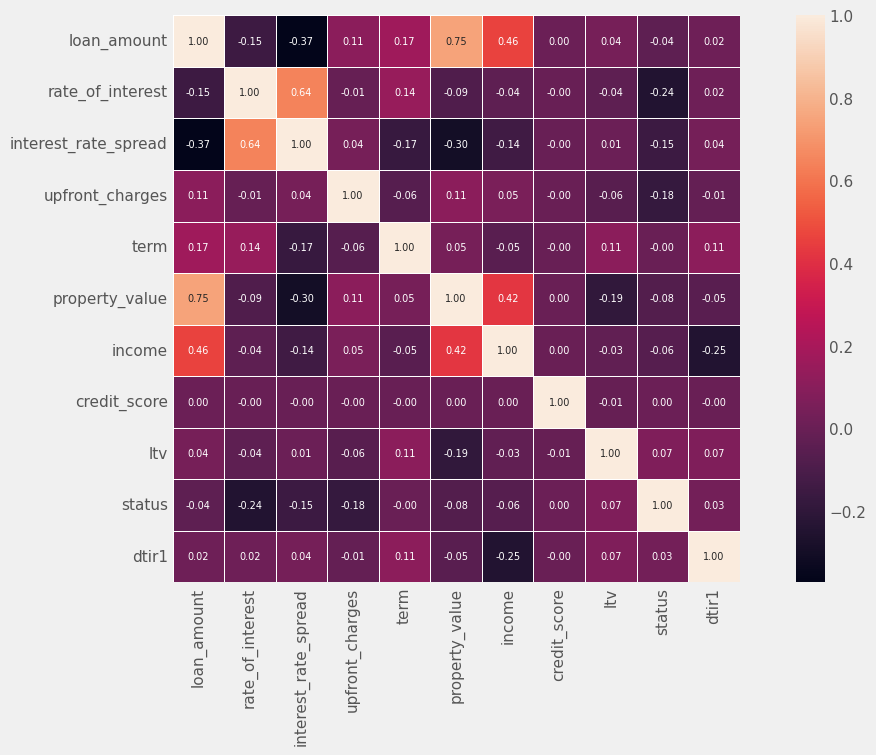

In [ ]:
#cbar: True o False. Muestra la barra lateral con el esquema de colores y valores de la correlación.
#square: True o False.
#True: establece el aspecto de los ejes iguales para que cada celda del mapa de calor tenga forma cuadrada.
#annot_kws: tamaño de la fuente. Podemos ajustar el tamaño de los valores de las correlaciones mostrados en cada celda.
#linewidth: separación entre celdas.
#cmap: paleta de colores a usar. En el ejemplo usamos 'coolwarm', pero hay muchos más como 'Set2', 'YlGnBu', 'Blues', 'BuPu', 'Greens', etc.

plt.figure(figsize=(13, 7))
sns.heatmap(df_corr, cmap="rocket", annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 7},
    linewidth=.5)

plt.show()

## Escalado de variables

In [ ]:
#Estandarizamos la base train (resto a cada variables la media y divido por el desvio estandar) valores para que tome la matriz de correlacion

from sklearn.preprocessing import StandardScaler
train=df_num.copy()
std=StandardScaler()
std_train=std.fit_transform(train)

In [ ]:
#Estandarizamos la base test (resto a cada variables la media y divido por el desvio estandar) valores para que tome la matriz de correlacion
test=df_num.copy()
std_test=std.transform(test)

## Selección de cantidad de componentes óptima

In [ ]:
#Quiero que pca me muestre los componentes optimo y veo cuanta varianza le corresponde a cada componente

from sklearn.decomposition import PCA
pca=PCA().fit(std_train)
pca.explained_variance_ratio_.shape #siempre devulve la misma cantidad de variables que se inserta, con la grafica ahi nosotros decidimos con cuantos componentes trabajar

(11,)

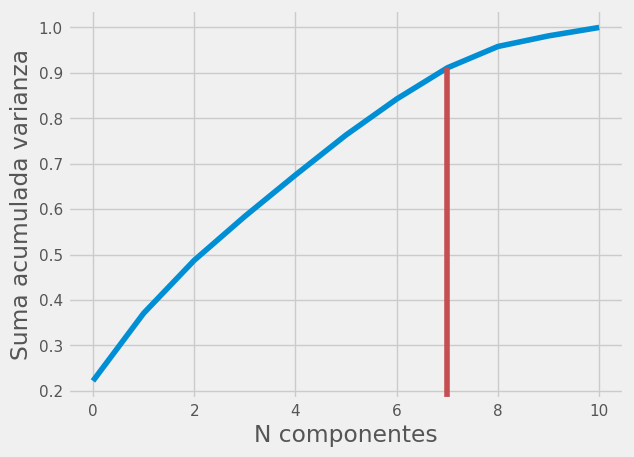

In [ ]:
arr_varianza=pca.explained_variance_ratio_
np.cumsum(arr_varianza) # (acumula la varianza(grafico es acumlativo)) La función numpy.cumsum devuelve la suma acumulada de los valores de un array a lo largo de los ejes especificados.
plt.plot(np.cumsum(arr_varianza))
plt.xlabel('N componentes')
plt.ylabel('Suma acumulada varianza')
plt.axvline(x=7, ymax=0.85, color="r", label="Óptimo")
plt.show()

In [ ]:
arr_pca_acum=np.cumsum(arr_varianza)

In [ ]:
#Verifico si realmente es 7 la cantidad de componentes optimos
#Efectivamnete 7 es la cantidad de componentes que acumula entre 0.85 y 0.95 % de varianza acumulada
arr_pca_acum=np.cumsum(arr_varianza) #renombro formula para poder ingresarla en la siguiente sentencia
np.where((arr_pca_acum>0.85) & (arr_pca_acum<0.95))

(array([7]),)

## **N componentes**

In [ ]:
n_components=7

In [ ]:
#Transformar el conjuto de datos estandarizado
pca_v2=PCA(n_components=7).fit_transform(std_train)

In [ ]:
pca_v2

array([[-1.01026889e+00,  2.60436031e+00,  3.14679516e-01, ...,
        -5.16588282e-01,  2.31598966e-02,  6.48203654e-02],
       [-7.62562543e-01,  1.44885242e+00, -1.26371146e-01, ...,
         1.19345822e+00, -3.96264733e-01,  7.88861604e-02],
       [ 1.45177933e-01, -4.90368196e-01,  1.19512231e+00, ...,
        -1.25254932e+00, -1.56482399e-01,  1.91121460e-01],
       ...,
       [ 1.05405561e+00,  7.07014361e-01, -1.50204159e+00, ...,
        -1.05256220e-03, -1.20212167e-01,  1.83184532e+00],
       [-6.93416171e-01, -1.33837844e-01, -2.73318636e+00, ...,
        -5.33025046e-02,  9.95685079e-01,  5.67983678e-01],
       [-7.92111734e-01, -1.91650635e+00, -5.46864845e-01, ...,
        -9.66965977e-01,  8.44970747e-01,  1.70664481e+00]])

In [ ]:
pca_v2.shape

(148670, 7)

Porcentaje de varianza explicada por cada componente
[0.2219767  0.14878346 0.11664242 0.0967907  0.09104362 0.08815876
 0.07906991 0.06862973 0.04704165 0.02335407 0.01850898]


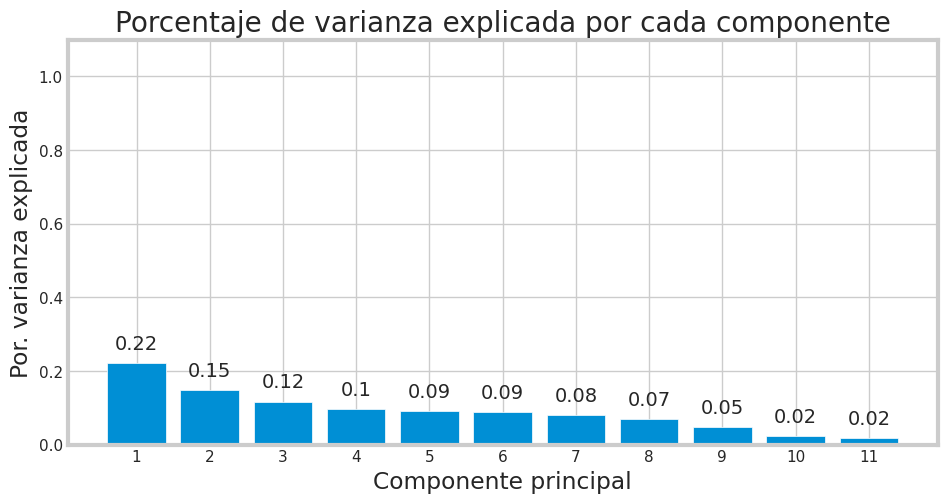

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(pca.n_components_) + 1,height = pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(df_num.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(pca.n_components_) + 1);ax.set_ylim(0, 1.1)

ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

## **Evaluación del modelo**

Ahora preprocesemos nuestros datos para modelos de aprendizaje automático. ''' Con la aplicacion CrossValidation se buscan los mejores hyperparametros de todos los algoritmos para que sean elegibles para el proyecto, nos enfocamos en la precision para tratar de minimizar los falsos positivos.

In [ ]:
# Atributos categoricos

df_full.drop(columns=['id'], inplace=True)

dtypes = pd.DataFrame(df_full.dtypes).reset_index()
cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)



# Variables binarias
binary_vars = ['security_type', 'submission_of_application', 'co-applicant_credit_type', 'secured_by',
               'lump_sum_payment', 'interest_only', 'neg_ammortization', 'construction_type', 'business_or_commercial',
               'open_credit', 'credit_worthiness', 'approv_in_adv', 'loan_limit', 'status']

La razón por la que estamos creando una lista de variables binarias es para reducir el tamaño de nuestro marco de datos después de la codificación. Queremos utilizar un codificador de etiquetas para las variables binarias que dará como resultado una columna de unos y ceros. Si usáramos OneHotEncoder de sklearn en variables binarias, crearía dos columnas, una para cada valor posible, lo cual es redundante considerando que podemos usar una columna donde el valor "1" representa un valor posible y "0" representa el otro.

In [ ]:
# Label Encoder
label = LabelEncoder()
for i in binary_vars:
    df_full[i] = label.fit_transform(df_full[i])



# OneHotEncoding
df_cat = df_full[cat_vars]
df_cat.drop(columns=binary_vars, inplace=True)

df_cat.columns

cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_1hot.toarray())


<ipython-input-410-5ece5f83df4b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=binary_vars, inplace=True)


In [ ]:

# Nombres de las columnas
cat_encoder.categories_
cat_columns = ['Female', 'Joint', 'Male', 'Sex Not Available','type1', 'type2', 'type3','p1', 'p2', 'p3', 'p4',
               'ir', 'pr', 'sr','U1', 'U2', 'U3', 'U4','CIB', 'CRIF', 'EQUI', 'EXP','age_25-34', 'age_35-44',
               'age_45-54', 'age_55-64', 'age_65-74', 'under_25', 'over_74','North', 'North-East', 'central', 'south']

df_cat_encoded.columns = cat_columns
df_full.drop(columns=df_cat.columns, inplace=True)
# Concat
df = pd.concat([df_full, df_cat_encoded], axis=1, join='inner')

Ahora estamos listos para dividir nuestros datos en un conjunto de entrenamiento y un conjunto de prueba.

In [ ]:
#Entreno modelo
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

y_train = train_set['status']
X_train = train_set.drop(columns=['status'])
y_test = test_set['status']
X_test = test_set.drop(columns=['status'])

Para modelar utilizo el clasificador XGBoostClassifier

In [ ]:
# Entreno modelo
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Scores on train set
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Cross-validation score: %.2f" % scores.mean())

# Prediction
xgb_preds = xgbc.predict(X_test)

# Mostramos la precision
accuracy_score(y_test, xgb_preds)
confusion_matrix(y_test, xgb_preds)

Cross-validation score: 0.96


array([[20730,   222],
       [  824,  6073]])

96% de precisión en el conjunto de prueba, XGBoost es un modelo de aprendizaje conjunto robusto que utiliza algoritmos de aumento de gradiente para fortalecer el modelo.

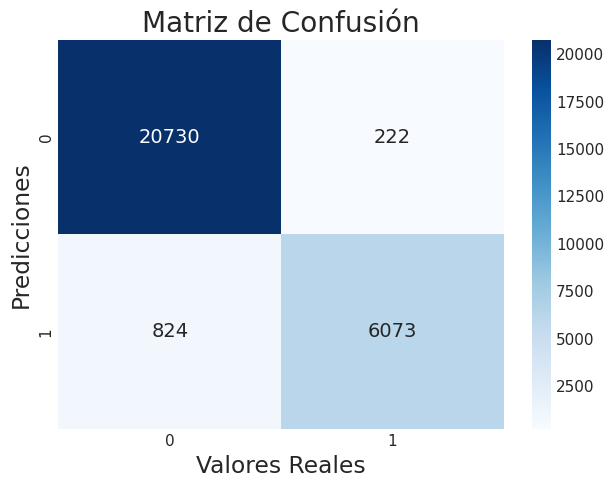

In [ ]:
# Crear la matriz de confusión
confusion_matrix = confusion_matrix(y_test, xgb_preds)

# Crear el heatmap utilizando Seaborn
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

# Configurar los ejes y el título
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Matriz de Confusión")

plt.show()

Conclusiones:

De acuerdo a los resultados obtenidos en el grafico:

El valor 20730 representa la cantidad de casos negativos que fueron clasificados correctamente como negativos (verdaderos negativos, VN).

El valor 222 indica la cantidad de casos negativos que fueron clasificados incorrectamente como positivos (falsos positivos, FP).

El valor 824 indica la cantidad de casos positivos que fueron clasificados incorrectamente como negativos (falsos negativos, FN).

El valor 6073 representa la cantidad de casos positivos que fueron clasificados correctamente como positivos (verdaderos positivos, VP).

En resumen, el modelo clasificó correctamente 20730 casos negativos y 6073 casos positivos. Sin embargo, se cometieron 824 falsos negativos y 222 falsos positivos.

En este proyecto de Machine Learning, la aplicación de técnicas de aprendizaje automático ha permitido identificar patrones en el comportamiento crediticio y en las características de los clientes, lo que ha contribuido de manera significativa a una evaluación más precisa de la elegibilidad para el efectivo otorgamiento de préstamos y a una predicción más acertada del riesgo de impago.